In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import os
import shutil
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
import string
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [3]:
# BOW에 기반한 Tf-idf 방법을 통해 word embedding
# kmeans를 활용한 caption clustering

In [4]:
# images captions
df = pd.read_csv('caption.csv')
df = df.dropna().reset_index()
df.head()

index  Unnamed: 0    image_name  \
0      0           0  10602072.jpg   
1      1           1  10637120.jpg   
2      2           2  10815824.jpg   
3      3           3  10751489.jpg   
4      4           4  10863862.jpg   

                                       image_caption  
0  a young girl wearing a pink shirt is jumping o...  
1    a boy in a blue shirt is climbing a rock wall .  
2  a group of people are riding a horse on a dirt...  
3  a man in a white shirt and black pants is hold...  
4  a man is sitting on a bench with his arms fold...

In [5]:
remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation) # Tokenize 시킬 때 구두점을 제외해주기 위해
lemmar = WordNetLemmatizer()

In [6]:
# 토큰화한 각 단어들의 어근 원형 반환
def LemTokens(tokens):
  return [lemmar.lemmatize(token) for token in tokens] 

def LemNormalize(text):
  return LemTokens(nltk.word_tokenize(text.lower().translate(remove_punct_dict)))

In [7]:
# Tf-idf 
tfidf_vect = TfidfVectorizer(tokenizer=LemNormalize,
                             stop_words='english', ngram_range=(1,2),
                             min_df=0.05, max_df=0.85)
ftr_vect = tfidf_vect.fit_transform(df['image_caption'])

/usr/local/lib/python3.8/dist-packages/sklearn/feature_extraction/text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn(


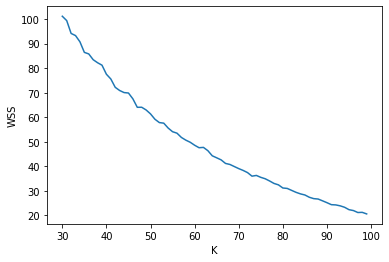

In [20]:
# KMeans 최적의 k 찾기

#wss=[]
#for k in np.arange(30,100):
#    km_k = KMeans(n_clusters=k).fit(ftr_vect)
#    wss.append(km_k.inertia_)
#inertia -> 군집의 응집도(within group sum of square)를 나타내는 값이다, 이 값이 작을 수록 응집도가 높게 군집화가 잘되었다고 평가할 수 있다.

#plt.plot(np.arange(30,100),wss)
#plt.xlabel('K')
#plt.ylabel('WSS')
#plt.show()

In [21]:
#from sklearn.cluster import DBSCAN
#dbscan = DBSCAN(eps=10, min_samples=10) # 반경은 10이고 최소 10개의 sample이 들어와야한다.
#cluster_label = dbscan.fit_predict(ftr_vect)
#cluster_label
# 모든 데이터가 하나로 클러스트링 됨(오류)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [8]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=30, max_iter=300, random_state=42)
cluster_label = kmeans.fit_predict(ftr_vect)

df['cluster_label'] = cluster_label
df.sort_values(by=['cluster_label'])

index  Unnamed: 0    image_name  \
555    558         558  51148570.jpg   
571    574         574  52989402.jpg   
243    245         245  24830572.jpg   
414    416         416  41253213.jpg   
193    195         195  22764427.jpg   
..     ...         ...           ...   
231    233         233  24053752.jpg   
136    138         138  18638574.jpg   
138    140         140  18105594.jpg   
490    493         493  47376414.jpg   
47      48          48  12904363.jpg   

                                         image_caption  cluster_label  
555   a group of people are sitting in a <unk> <unk> .              0  
571    a group of people are gathered around a <unk> .              0  
243    a group of people are gathered around a <unk> .              0  
414    a group of people are gathered around a <unk> .              0  
193    a group of people are gathered around a <unk> .              0  
..                                                 ...            ...  
231  a young boy in a red shirt is riding a bike in...             29  
136  a young boy wearing a red shirt is holding a b...             29  
138   a boy in a red uniform is running on the grass .             29  
490  a boy in a swimming pool is being splashed by ...             29  
47                       a boy is swimming in a pool .             29  

[599 rows x 5 columns]

In [9]:
cluster_centers = kmeans.cluster_centers_
print(cluster_centers.shape)
print(cluster_centers) # 각 feature(단어)와 클러스터 중심간의 상대적인 위치값들

(30, 38)
[[0.         0.         0.         ... 0.         0.         0.01776956]
 [0.         0.30480417 0.         ... 0.         0.42602968 0.        ]
 [0.0113521  0.         0.         ... 0.         0.         0.06301832]
 ...
 [0.         0.         0.         ... 0.         0.         0.1071403 ]
 [0.         0.27099978 0.         ... 0.07930713 0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.29566107]]


In [10]:
# 클러스터 중심과의 위치값 활용해 각 클러스터의 핵심 단어 추출
def get_cluster_datails(cluster_model, cluster_data, feature_names,
                        cluster_num, top_n_features):
  cluster_details = {}
  center_feature_idx = cluster_model.cluster_centers_.argsort()[:,::-1] 

  for cluster_num in range(cluster_num):
    cluster_details[cluster_num] = {}
    cluster_details[cluster_num]['cluster'] = cluster_num

    top_ftr_idx = center_feature_idx[cluster_num, :top_n_features] # center와 가까운 상위 n개
    top_ftr = [feature_names[idx] for idx in top_ftr_idx]
    top_ftr_val = cluster_model.cluster_centers_[cluster_num, top_ftr_idx].tolist()

    cluster_details[cluster_num]['top_features'] = top_ftr
    cluster_details[cluster_num]['top_features_value'] = top_ftr_val
    filenames = cluster_data[cluster_data['cluster_label']==cluster_num]['image_name']
    filenames = filenames.values.tolist()
    cluster_details[cluster_num]['filenames'] = filenames

  return cluster_details

In [11]:
feature_names = tfidf_vect.get_feature_names()
cluster_details = get_cluster_datails(cluster_model=kmeans,
                                      cluster_data=df,
                                      feature_names=feature_names,
                                      cluster_num=30,
                                      top_n_features=3)

def print_cluster_details(cluster_details):
  for cluster_num, cluster_detail in cluster_details.items():
    print(f'#####Cluster Num: {cluster_num} \n')
    print('상위 3개 feature 단어들: \n', cluster_detail['top_features'])
    print()
    print(f'Cluster {cluster_num}으로 분류된 이미지들: \n{cluster_detail["filenames"]}')
    print('-'*20)
print_cluster_details(cluster_details)

#####Cluster Num: 0 

상위 3개 feature 단어들: 
 ['people', 'unk', 'group people']

Cluster 0으로 분류된 이미지들: 
['10815824.jpg', '12770842.jpg', '13042995.jpg', '13255060.jpg', '13652901.jpg', '14153510.jpg', '14559446.jpg', '16639719.jpg', '19366040.jpg', '19810652.jpg', '19469520.jpg', '19986766.jpg', '21225351.jpg', '22764427.jpg', '24188477.jpg', '24183660.jpg', '24830572.jpg', '26758039.jpg', '32080607.jpg', '32627994.jpg', '32774948.jpg', '33703543.jpg', '35652137.jpg', '40261771.jpg', '41253213.jpg', '42165458.jpg', '42018548.jpg', '41868213.jpg', '43980543.jpg', '45934206.jpg', '48509840.jpg', '48909501.jpg', '49227122.jpg', '51148570.jpg', '53151283.jpg', '52989402.jpg', '52581560.jpg', '56013036.jpg']
--------------------
#####Cluster Num: 1 

상위 3개 feature 단어들: 
 ['woman white', 'white shirt', 'white']

Cluster 1으로 분류된 이미지들: 
['15305247.jpg', '19965828.jpg', '22143604.jpg', '22215229.jpg', '23329858.jpg', '23473996.jpg', '24759839.jpg', '36391683.jpg', '39494353.jpg', '42093858.jpg', '

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [12]:
#f_name

['group people', 'people', 'group']


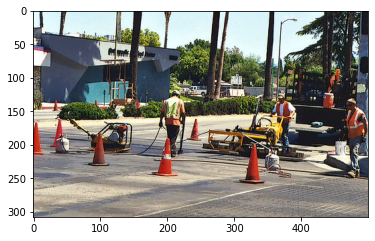

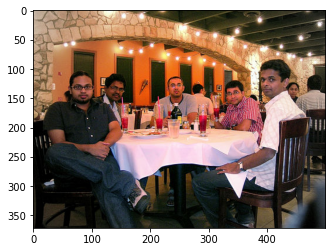

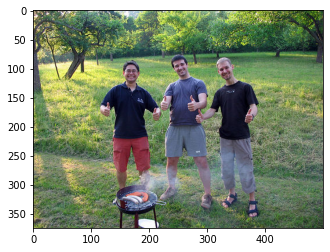

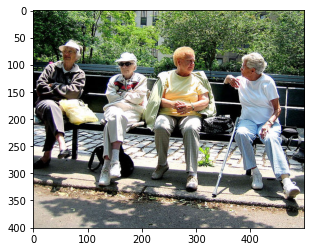

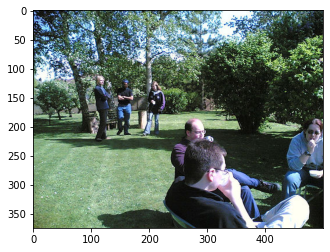

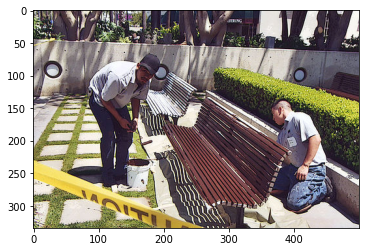

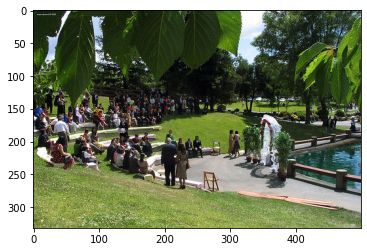

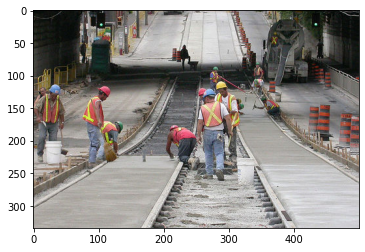

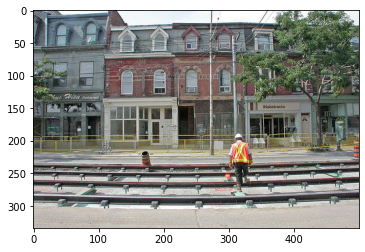

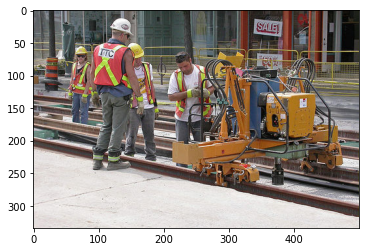

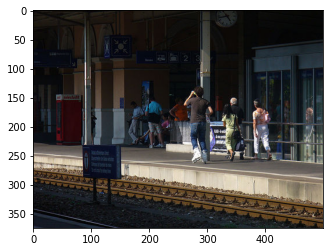

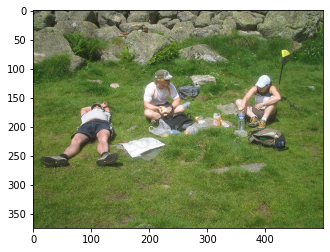

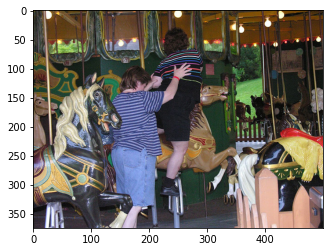

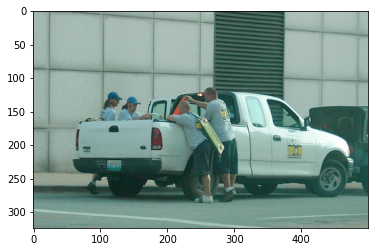

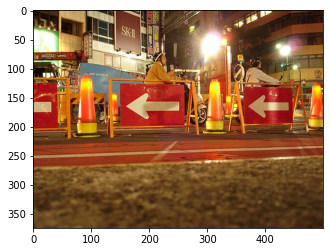

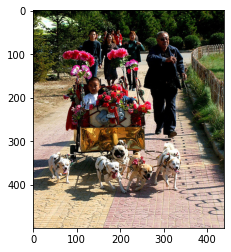

In [13]:
# Cluster 23 이미지 출력
print(cluster_details[23]['top_features'])

from PIL import Image
for img in cluster_details[23]['filenames']:
  img_open = Image.open(f'/content/drive/MyDrive/딥러닝 프로젝트/캡션 생성/images/{img}')
  plt.imshow(np.array(img_open))
  plt.show()

In [14]:
# top_n_features명으로 클러스트링 된 이미지 들어갈 파일 생성
f_name = []
for i in range(len(cluster_details)):
  f_name.append(cluster_details[i]['top_features'])

for i in f_name:
  if not os.path.exists(f'/content/drive/MyDrive/딥러닝 프로젝트/clustering_done/{i}'):
    os.makedirs(f'/content/drive/MyDrive/딥러닝 프로젝트/clustering_done/{i}')

In [15]:
for i in range(len(cluster_details)):
  c_idx = df[df['cluster_label']==i].index
  for j in c_idx:
    for k in f_name[i]:
      if k in df.iloc[j].image_caption:
        shutil.copy(f'/content/drive/MyDrive/딥러닝 프로젝트/캡션 생성/images/{df.iloc[j].image_name}', 
                    f'/content/drive/MyDrive/딥러닝 프로젝트/clustering_done/{f_name[i]}/{df.iloc[j].image_name}')

In [16]:
# os.listdir('/content/drive/MyDrive/딥러닝 프로젝트/clustering_done')

['group people', 'people', 'group']


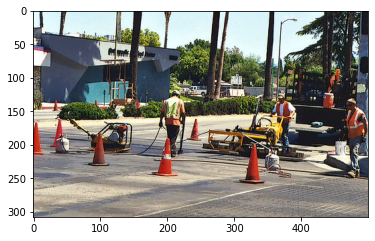

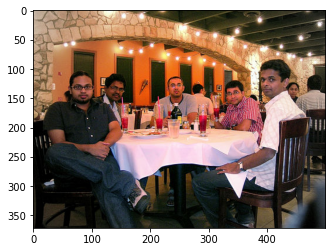

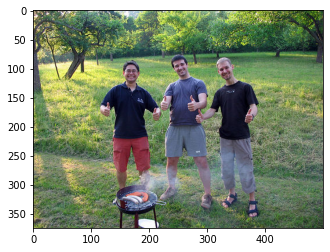

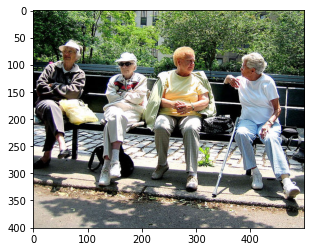

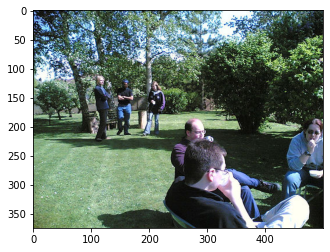

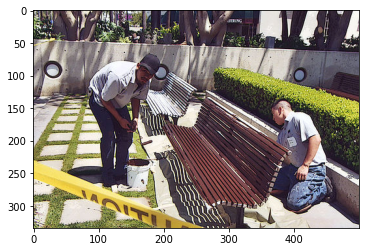

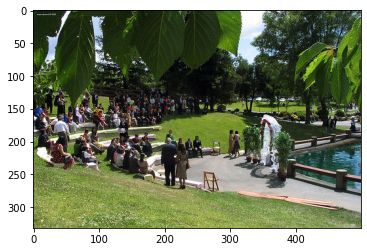

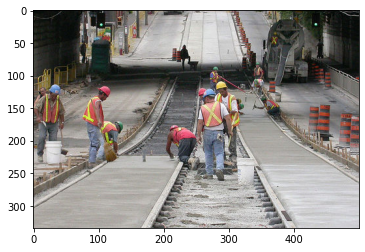

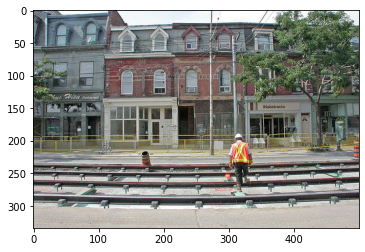

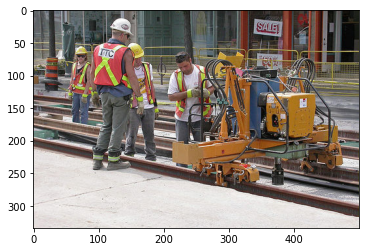

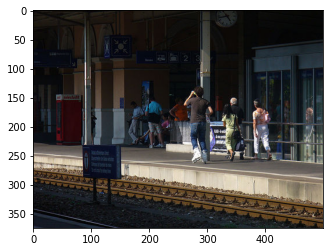

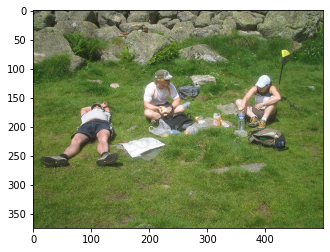

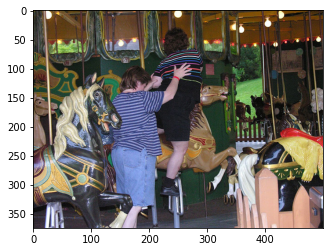

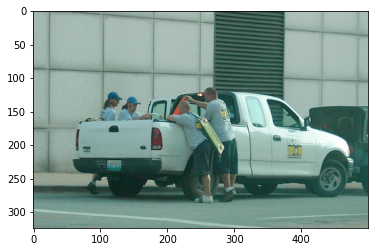

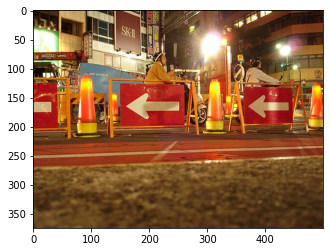

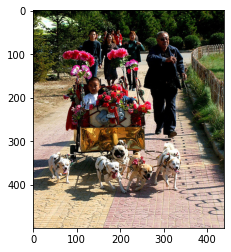

In [17]:
# 생성한 폴더 안 이미지 출력해보기
folder_name = "['group people', 'people', 'group']"
print(folder_name)
for img in os.listdir(f'/content/drive/MyDrive/딥러닝 프로젝트/clustering_done/{folder_name}'):
  image = Image.open(f'/content/drive/MyDrive/딥러닝 프로젝트/clustering_done/{folder_name}/{img}')
  plt.imshow(np.array(image))
  plt.show()

['standing', 'man', 'people'] 카테고리로 클러스트링된 캡션들의 인덱스:
 Int64Index([12, 61, 121, 181, 309, 330, 332, 341, 347, 389, 403, 471, 487, 500,
            531],
           dtype='int64')


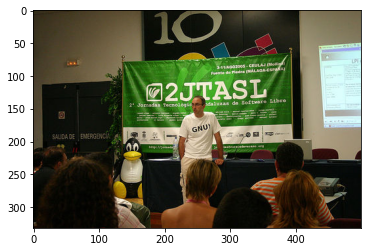

[[0.79999213 0.45945281 0.79999213 0.55563513 0.57365925 1.
  0.79999213 0.53643678 1.         0.79999213 0.79999213 0.79999213
  1.         0.69533178 0.55563513]]


In [18]:
# 특정 클러스터 레이블의 캡션 간 유사도 측정 by 코사인 유사도
i = 22
c_idx = df[df['cluster_label']==i].index
print(f'{f_name[i]} 카테고리로 클러스트링된 캡션들의 인덱스:\n', c_idx)

comparison_caption = df.iloc[c_idx[5]]['image_name']
img_open = Image.open(f'/content/drive/MyDrive/딥러닝 프로젝트/캡션 생성/images/{comparison_caption}')
plt.imshow(np.array(img_open))
plt.show()

similarity = cosine_similarity(ftr_vect[c_idx[5]], ftr_vect[c_idx])
print(similarity)

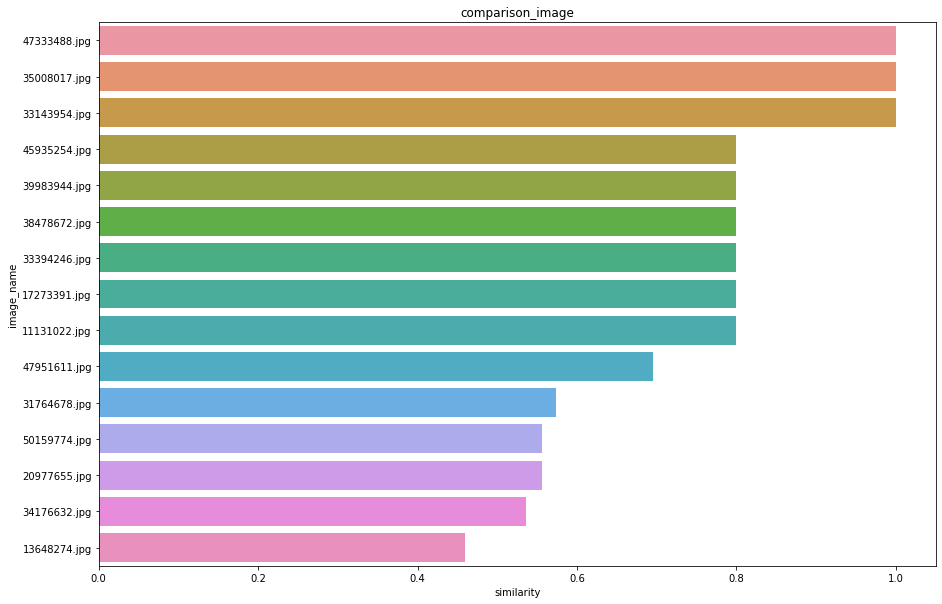

In [19]:
sorted_idx = similarity.argsort()[:,::-1]
c_sorted_idx = c_idx[sorted_idx.reshape(-1,)]
c_sim_values = np.sort(similarity.reshape(-1,))[::-1]
c_sim_df = pd.DataFrame()
c_sim_df['image_name'] = df.iloc[c_sorted_idx]['image_name']
c_sim_df['similarity'] = c_sim_values

plt.figure(figsize=(15,10))
sns.barplot(data=c_sim_df, x='similarity', y='image_name')
plt.title('comparison_image')
plt.show()